## Data Aware Grids
---
![Facetgrid](https://seaborn.pydata.org/_images/seaborn-FacetGrid-5.png)

There is sometimes a relationship between more than 3 sets of data, making 3D graphs irrelevant, and that can't be aggregated in a way that will allow regression plots to reveal the relationship. For this, we need data-aware plots, where sets of data are plotted next to/on top of each other to reveal hidden relationships.  

In [1]:
# Initial Setup
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Facetgrid
Seaborn's ```FacetGrid``` is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

Don't ever use ```FacetGrid```, just to complete you understanding.

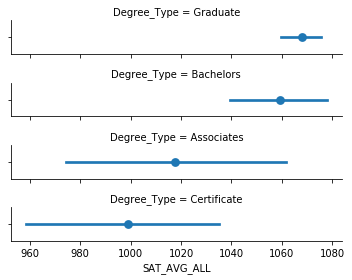

In [9]:
df = pd.read_csv('college_datav3.csv')

# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
_ = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'],
             height=1,
             aspect=5)

# Map a pointplot of SAT_AVG_ALL onto the grid
_.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()

From this we can see people with a Graduate degree have higher SATs than those with Certificate degrees

### Factorplot
As with the ```Facetplot```, the ```factorplot``` will plot features of a data set next to each other, but without having to ```map``` the features.

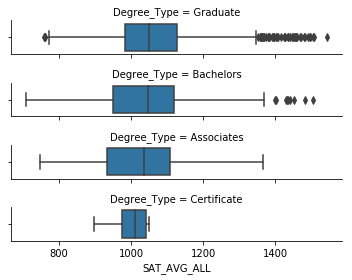

In [17]:
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='box',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'],
        height=1,
        aspect=5)

plt.show()

### Lmplot
A plot we covered in the Intro, we saw how multiple plots could be layed on top of each other. What we didn't realise is this was using FacetGrid in the background. These next 3 cells show you how it can be done with ```FacetGrid``` and ```map``` and how it can be done using the built in methods.

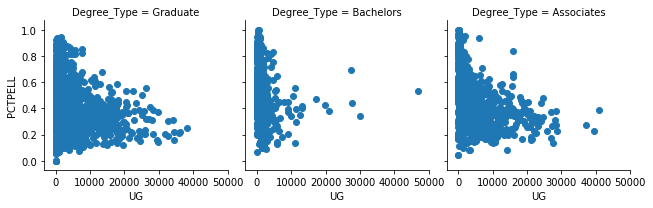

In [25]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
_ = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
_.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()

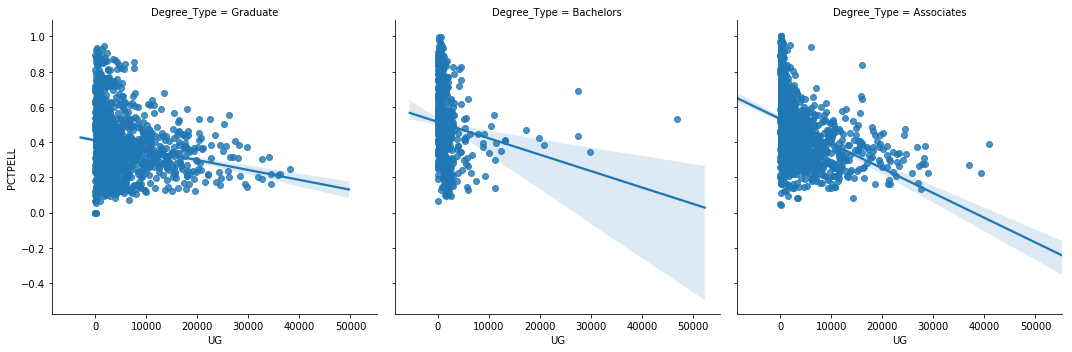

In [21]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()

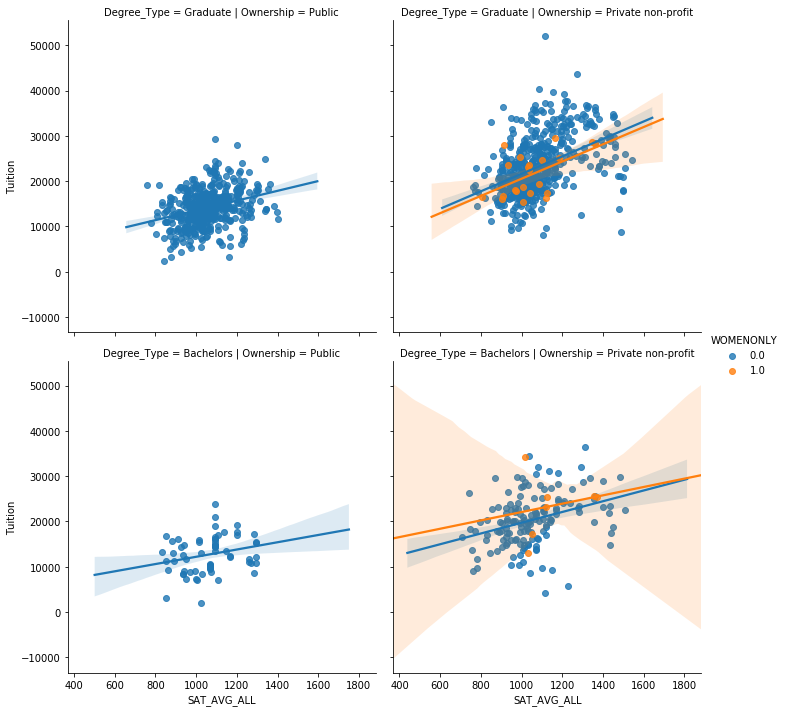

In [24]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=['Public', 'Private non-profit'])

plt.show()

Even the hue is using FacetGrid in the background. When using all the parameters in Seaborn plots, they become very powerful at disaplying such dense amounts of data in an intuitive plot.

### PairGrid
When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation. Seaborn supports this pair-wise analysis using the ```PairGrid```.

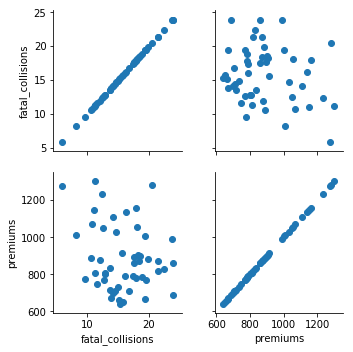

In [26]:
df = pd.read_csv('insurance_premiums.csv')

_ = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
_ = _.map(plt.scatter)

plt.show()

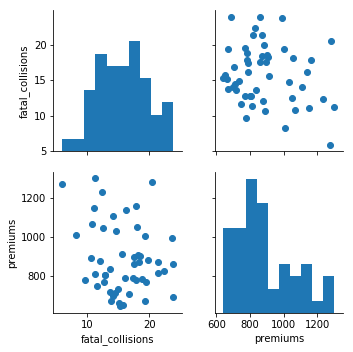

In [27]:
# You can customise what type of plot is displayed in the diagonal and the off-diagonal
_ = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])

_ = _.map_diag(plt.hist)
_ = _.map_offdiag(plt.scatter)

plt.show()

### Pairplot
Like with ```FacetGrid```, ```PairGrid``` is the foundational method that a lot of easier-to-use methods are built of, which do more with less effort. One of these is the ```pairplot```.

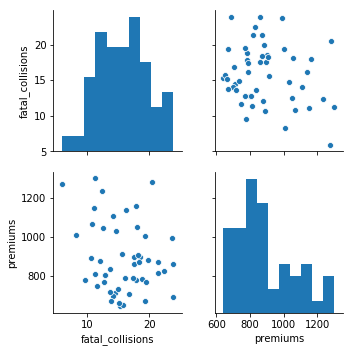

In [28]:
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()

Same thing, just a lot easier, and now we can see how we can do even more with it (using ```FacetGrid```s)

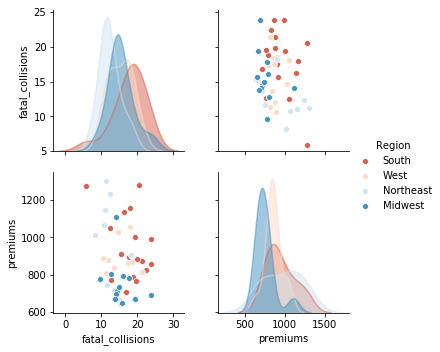

In [32]:
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()

As soon as ```hue``` is used, the default diagonal plot becomes a distribution and a legend is added. Let's look at another way the pairplot can be customised: specifying the x and y variables.

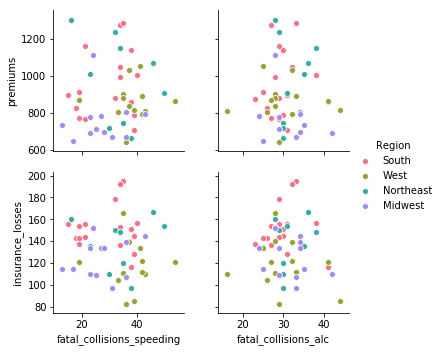

In [33]:
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()

When using a hue, we can specify which plot to use on the diagonal (options currently are 'kde' or 'hist') and we can even use regressional plots on the off-diagonal to see relstionships.

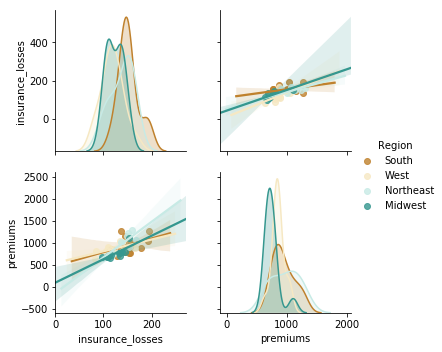

In [40]:
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()

### JointGrid
By now you should see the pattern, will first introduce you to a type of powerful new visualation through it foundation method and then we will see an easier way of doing it.

Seaborn's ```JointGrid``` combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. The process for creating these plots should be familiar to you now.

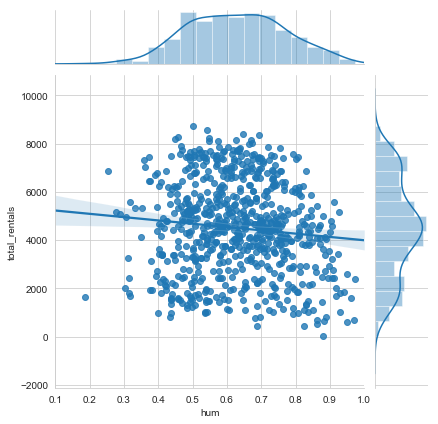

In [43]:
df = pd.read_csv("bike_share.csv")

sns.set_style("whitegrid")
_ = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

_.plot(sns.regplot, sns.distplot)

plt.show()

### JointPlot
And to the more intuitive version of ```jointgrid```

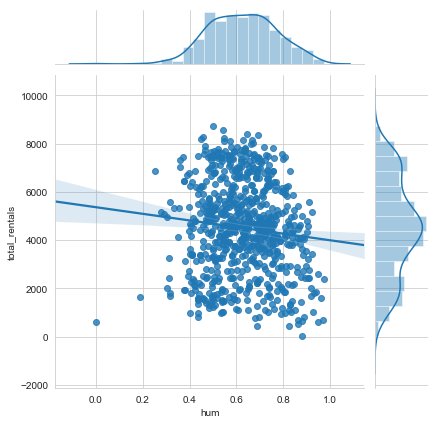

In [44]:
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()

Add some customisation to the regression

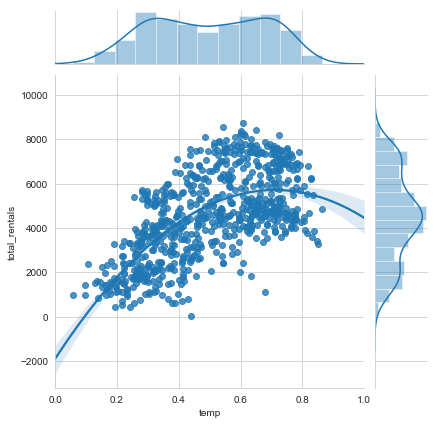

In [45]:
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()

Turn it into a residual plot

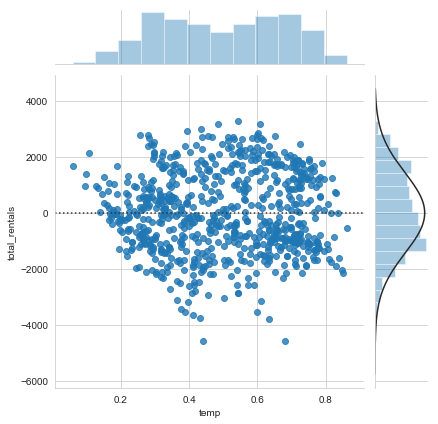

In [48]:
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()

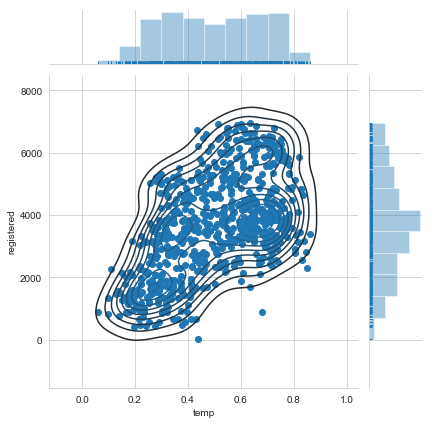

In [49]:
_ = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()